Primeras 5 filas del conjunto de datos:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_dilu

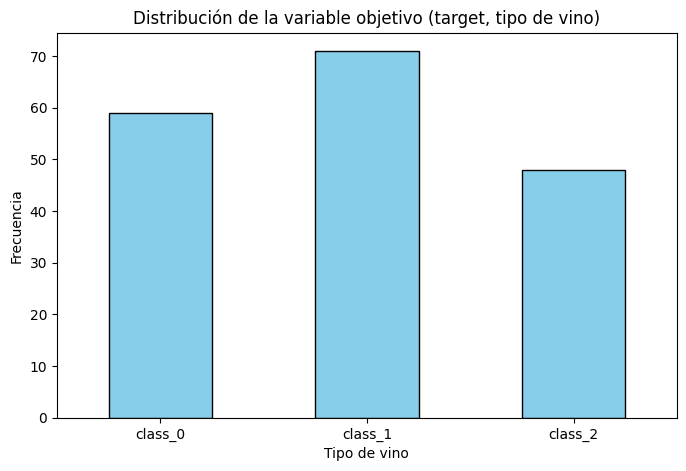


Valores nulos
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine


wine_data = load_wine()
df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)
df['target'] = wine_data.target

print("Primeras 5 filas del conjunto de datos:")
print(df.head())

print("\nResumen estadístico")
print(df.describe())

plt.figure(figsize=(8, 5))
df['target'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribución de la variable objetivo (target, tipo de vino)')
plt.xlabel('Tipo de vino')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1, 2], labels=wine_data.target_names, rotation=0)
plt.show()

null_counts = df.isnull().sum()
print("\nValores nulos")
print(null_counts)

### Análisis Exploratorio de Datos

### Pregunta 2: Preparación de Datos


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")




Tamaño del conjunto de entrenamiento: (89, 13)
Tamaño del conjunto de prueba: (89, 13)


### Modelado Predictivo


Evaluación del modelo:
              precision    recall  f1-score   support

     class_0       0.91      0.88      0.89        33
     class_1       0.86      0.91      0.89        34
     class_2       1.00      0.95      0.98        22

    accuracy                           0.91        89
   macro avg       0.92      0.92      0.92        89
weighted avg       0.91      0.91      0.91        89



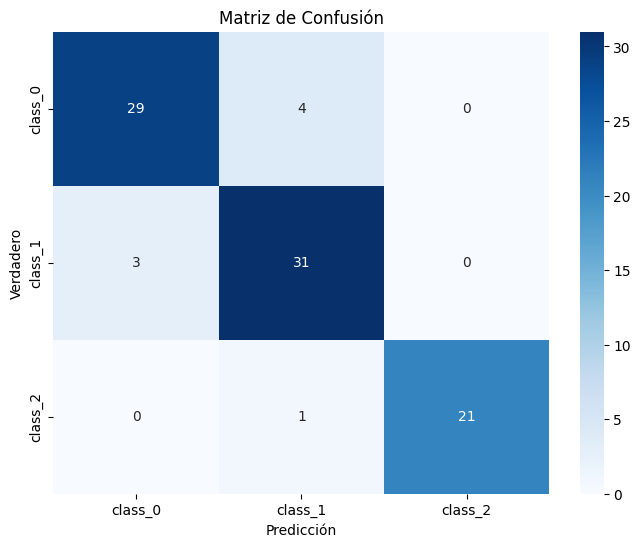

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nEvaluación del modelo:")
print(classification_report(y_test, y_pred, target_names=wine_data.target_names))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()


###  Análisis de Componentes Principales (PCA)


Varianza explicada por componente:
Componente 1: 0.3620
Componente 2: 0.1921
Componente 3: 0.1112
Componente 4: 0.0707
Componente 5: 0.0656
Componente 6: 0.0494
Componente 7: 0.0424
Componente 8: 0.0268
Componente 9: 0.0222
Componente 10: 0.0193
Componente 11: 0.0174
Componente 12: 0.0130
Componente 13: 0.0080


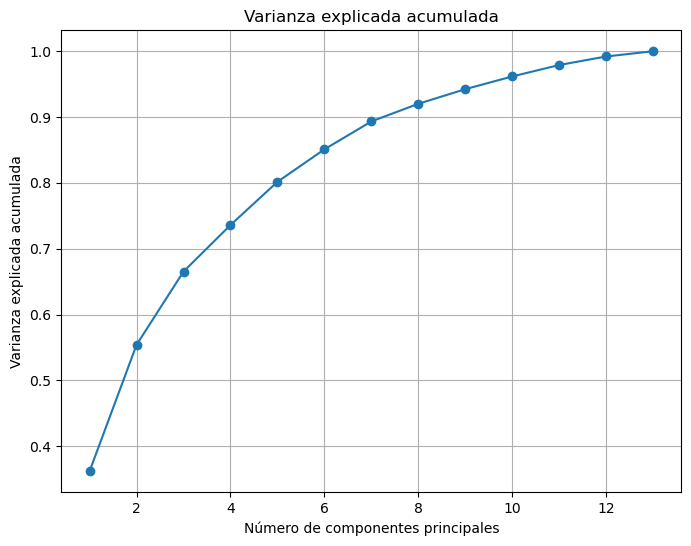

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

var1 = pca.explained_variance_ratio_
cumulative_variance = var1.cumsum()

print("\nVarianza explicada por componente:")
for i, var in enumerate(var1):
    print(f"Componente {i + 1}: {var:.4f}")

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid()
plt.show()


### Eleccion de modelo con PCA


Evaluación del modelo SVC en espacio PCA:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



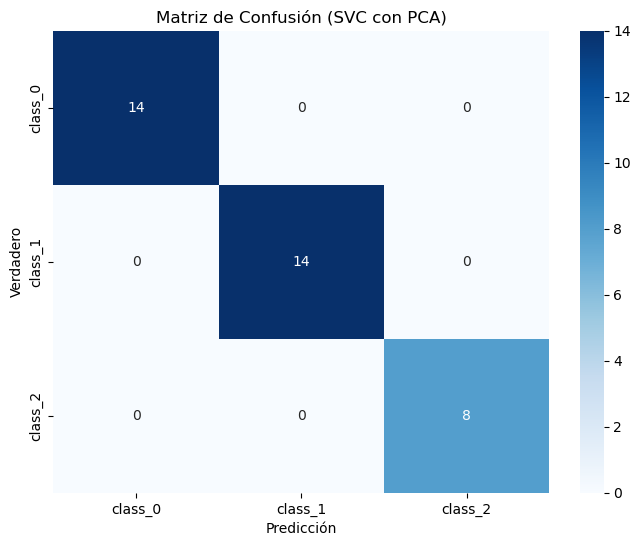

In [ ]:
from sklearn.svm import SVC

X_pca = pca.fit_transform(X_scaled)

#Utilizamos 10 componentes porque según el gráfico del apartado anterior con 10 componentes capturamos el 95% de la varianza
pca_95 = PCA(n_components=10)
X_pca_95 = pca_95.fit_transform(X_scaled)

# Dividir en conjunto de entrenamiento y prueba
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_95, y, test_size=0.2, random_state=42)

svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train_pca, y_train_pca)

y_pred_pca = svc.predict(X_test_pca)

print("\nEvaluación del modelo SVC en espacio PCA:")
print(classification_report(y_test_pca, y_pred_pca, target_names=wine_data.target_names))

conf_matrix_pca = confusion_matrix(y_test_pca, y_pred_pca)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_pca, annot=True, fmt='d', cmap='Blues', xticklabels=wine_data.target_names, yticklabels=wine_data.target_names)
plt.title('Matriz de Confusión (SVC con PCA)')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()